# General Overview - Statistical Analysis

- Are there variables that are particularly significant in terms of explaining the answer to your project question?
- Are there significant differences between subgroups in your data that may be relevant to your project aim?
- Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?
- What are the most appropriate tests to use to analyze these relationships?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

sns.set(style='darkgrid')
%matplotlib inline

import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import norm, t, chisquare
from scipy.stats import chi2_contingency
from numpy.random import seed
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

/Users/annatang/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('diabetes_visual.csv', index_col=0) # import data
diabetes = data.copy() # save a copy of data as diabetes

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61678 entries, 0 to 61677
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   race                    61678 non-null  object
 1   gender                  61678 non-null  object
 2   age                     61678 non-null  object
 3   time_in_hospital        61678 non-null  int64 
 4   num_lab_procedures      61678 non-null  int64 
 5   num_procedures          61678 non-null  int64 
 6   num_medications         61678 non-null  int64 
 7   num_outpatient          61678 non-null  int64 
 8   num_emergency           61678 non-null  int64 
 9   num_inpatient           61678 non-null  int64 
 10  diag_1                  61678 non-null  object
 11  num_diagnoses           61678 non-null  int64 
 12  max_glu_serum           61678 non-null  object
 13  A1Cresult               61678 non-null  object
 14  metformin               61678 non-null  object
 15  re

In [4]:
diabetes.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type
0,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,No,No,Up,No,No,No,Ch,Yes,YES,Emergency
1,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,...,No,No,No,No,No,No,No,Yes,NO,Emergency
2,Caucasian,Male,[30-40),2,44,1,16,0,0,0,...,No,No,Up,No,No,No,Ch,Yes,NO,Emergency
3,Caucasian,Male,[40-50),1,51,0,8,0,0,0,...,No,No,Steady,No,No,No,Ch,Yes,NO,Emergency
4,Caucasian,Male,[50-60),3,31,6,16,0,0,0,...,No,No,Steady,No,No,No,No,Yes,YES,Urgent


In [5]:
round(diabetes.describe(), 2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,num_diagnoses
count,61678.00,61678.00,61678.00,61678.00,61678.00,61678.00,61678.00,61678.00
mean,4.11,42.19,1.39,15.04,0.17,0.05,0.08,7.20
std,2.75,19.77,1.72,7.18,0.54,0.23,0.28,1.98
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,2.00
25%,2.00,30.00,0.00,10.00,0.00,0.00,0.00,6.00
50%,3.00,43.00,1.00,14.00,0.00,0.00,0.00,8.00
75%,6.00,56.00,2.00,19.00,0.00,0.00,0.00,9.00
max,13.00,102.00,6.00,40.00,3.00,1.00,1.00,13.00


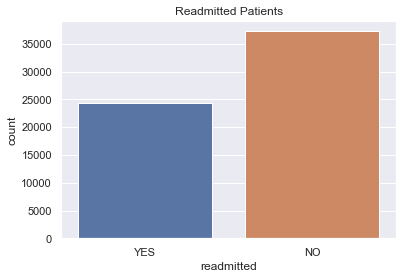

In [6]:
# readmit rates
sns.countplot(x='readmitted', data=diabetes)
plt.title('Readmitted Patients')
plt.show()

# categorical variables

The categorical variables are: race, gender, age, discharge disposition, diagnosis 1, 2, and 3, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, insulin, glyburide-metformin, glipizide-metformin, metformin-pioglitazone, change, diabetesMed, readmitted, and admission_type.

For the categorical variables, we are using the chi-square test for association with a p-value of 0.005.

## chi-square test for association

In [7]:
# define a function that returns a table, a chi-square value, and a p value
def chisquare_test(var):
    chi_test = pd.crosstab(var, diabetes.readmitted)
    display(chi_test)
    
    chisq_value, pvalue, df, expected = chi2_contingency(chi_test)
    
    print('Chi-square value: ', chisq_value)
    print('p-value: ', pvalue)

In [8]:
cols_cat = ['race', 'gender', 'age', 'diag_1', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed', 'admission_type']

for x in cols_cat:
    print(x)
    chisquare_test(diabetes[x])
    print('\n')

race


readmitted,NO,YES
race,,
AfricanAmerican,7166,4434
Asian,318,140
Caucasian,28166,19039
Hispanic,891,448
Other,715,361


Chi-square value:  72.98188617613104
p-value:  5.322444514367652e-15


gender


readmitted,NO,YES
gender,,
Female,19627,13246
Male,17629,11176


Chi-square value:  14.296337104331847
p-value:  0.00015616846810506408


age


readmitted,NO,YES
age,,
[0-10),86,21
[10-20),281,133
[20-30),664,280
[30-40),1642,711
[40-50),3947,2061
[50-60),7008,3952
[60-70),8387,5483
[70-80),8779,6858
[80-90),5443,4349


Chi-square value:  502.93237887489096
p-value:  1.354311306413841e-102


diag_1


readmitted,NO,YES
diag_1,,
Circulatory,10807,7866
Diabetes,2844,2011
Digestive,3629,2225
Genitourinary,1917,1187
Injury,2542,1556
Musculoskeletal,2428,1286
Neoplasms,1565,741
Other,6504,4050
Respiratory,5020,3500


Chi-square value:  176.26399342971172
p-value:  6.264335325425489e-34


max_glu_serum


readmitted,NO,YES
max_glu_serum,,
>200,457,358
>300,325,300
None,35576,23188
Norm,898,576


Chi-square value:  25.469127606044324
p-value:  1.2318031659206365e-05


A1Cresult


readmitted,NO,YES
A1Cresult,,
>7,1579,969
>8,3265,2097
None,30231,20142
Norm,2181,1214


Chi-square value:  27.248289324550477
p-value:  5.222280196783396e-06


change


readmitted,NO,YES
change,,
Ch,15808,11392
No,21448,13030


Chi-square value:  106.1795846158679
p-value:  6.734690226406365e-25


diabetesMed


readmitted,NO,YES
diabetesMed,,
No,10049,5180
Yes,27207,19242


Chi-square value:  263.1259339768982
p-value:  3.5739833445329557e-59


admission_type


readmitted,NO,YES
admission_type,,
Elective,7973,4222
Emergency,18913,12629
Newborn,6,3
Trauma Center,17,0
Unknown,3747,3079
Urgent,6600,4489


Chi-square value:  230.39862142451992
p-value:  8.785291862286716e-48




Based on the chi-square and p-value, we can safely say that there is no relation between the independent variables and the target variable.

### medications

In [9]:
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
               'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
               'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
               'insulin', 'glyburide-metformin', 'glipizide-metformin', 'metformin-pioglitazone']

for x in medications:
    print(x)
    chisquare_test(diabetes[x])
    print('\n')

metformin


readmitted,NO,YES
metformin,,
Down,230,141
No,29024,19405
Steady,7539,4611
Up,463,265


Chi-square value:  21.781730878174024
p-value:  7.242044785823182e-05


repaglinide


readmitted,NO,YES
repaglinide,,
Down,14,11
No,36839,24021
Steady,368,363
Up,35,27


Chi-square value:  31.959813798642124
p-value:  5.336524970274544e-07


nateglinide


readmitted,NO,YES
nateglinide,,
Down,5,3
No,37006,24230
Steady,236,184
Up,9,5


Chi-square value:  3.2402607066333555
p-value:  0.35604416068453487


chlorpropamide


readmitted,NO,YES
chlorpropamide,,
Down,1,0
No,37220,24392
Steady,35,27
Up,0,3


Chi-square value:  5.638012321750632
p-value:  0.13061306570522213


glimepiride


readmitted,NO,YES
glimepiride,,
Down,63,52
No,35327,23118
Steady,1751,1181
Up,115,71


Chi-square value:  2.2908598724891256
p-value:  0.5142741739036634


acetohexamide


readmitted,NO,YES
acetohexamide,,
No,37256,24422


Chi-square value:  0.0
p-value:  1.0


glipizide


readmitted,NO,YES
glipizide,,
Down,157,148
No,32784,21029
Steady,4034,3036
Up,281,209


Chi-square value:  51.2142011602715
p-value:  4.404101071349794e-11


glyburide


readmitted,NO,YES
glyburide,,
Down,194,166
No,33243,21568
Steady,3507,2455
Up,312,233


Chi-square value:  16.282791870877233
p-value:  0.0009922080487649433


tolbutamide


readmitted,NO,YES
tolbutamide,,
No,37245,24417
Steady,11,5


Chi-square value:  0.18239693083154748
p-value:  0.6693213969556527


pioglitazone


readmitted,NO,YES
pioglitazone,,
Down,35,31
No,34586,22457
Steady,2557,1858
Up,78,76


Chi-square value:  20.28569476495839
p-value:  0.00014810326213961182


rosiglitazone


readmitted,NO,YES
rosiglitazone,,
Down,40,17
No,34932,22632
Steady,2214,1729
Up,70,44


Chi-square value:  34.03837705331547
p-value:  1.9445711495396458e-07


acarbose


readmitted,NO,YES
acarbose,,
No,37172,24336
Steady,80,80
Up,4,6


Chi-square value:  9.005536270285305
p-value:  0.011078287857023975


miglitol


readmitted,NO,YES
miglitol,,
Down,0,1
No,37249,24410
Steady,7,10
Up,0,1


Chi-square value:  5.680107310817565
p-value:  0.1282543895506613


troglitazone


readmitted,NO,YES
troglitazone,,
No,37255,24420
Steady,1,2


Chi-square value:  0.13577787453213114
p-value:  0.7125149870264836


tolazamide


readmitted,NO,YES
tolazamide,,
No,37236,24413
Steady,20,9


Chi-square value:  0.5671009881211232
p-value:  0.4514132115923074


insulin


readmitted,NO,YES
insulin,,
Down,3508,2781
No,19299,11711
Steady,11315,7451
Up,3134,2479


Chi-square value:  148.77020392620165
p-value:  4.853433390709396e-32


glyburide-metformin


readmitted,NO,YES
glyburide-metformin,,
Down,3,0
No,37002,24239
Steady,246,182
Up,5,1


Chi-square value:  4.825772220839777
p-value:  0.18500863650591978


glipizide-metformin


readmitted,NO,YES
glipizide-metformin,,
No,37253,24418
Steady,3,4


Chi-square value:  0.3168355892958028
p-value:  0.5735155746611379


metformin-pioglitazone


readmitted,NO,YES
metformin-pioglitazone,,
No,37255,24422
Steady,1,0


Chi-square value:  0.045257823887722565
p-value:  0.8315306521480261




The medications: nateglinide, chlorpropamide, glimepiride, acetohexamide, glyburide, tolbutamide, acarbose, miglitol, troglitazone, tolazamide, glyburide-metformin, glipizide-metformin, and metformin-pioglitazone all failed to pass the test since they have p-values greater than 0.005.

Since these variables are not independent of the target variable, we are removing them from the dataset.

In [10]:
meds = ['nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'tolbutamide', 'acarbose', 
        'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 
        'metformin-pioglitazone']

diabetes = diabetes.drop(columns=meds)

In [11]:
diabetes.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,...,repaglinide,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,admission_type
0,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,No,No,No,No,No,Up,Ch,Yes,YES,Emergency
1,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,...,No,Steady,No,No,No,No,No,Yes,NO,Emergency
2,Caucasian,Male,[30-40),2,44,1,16,0,0,0,...,No,No,No,No,No,Up,Ch,Yes,NO,Emergency
3,Caucasian,Male,[40-50),1,51,0,8,0,0,0,...,No,Steady,No,No,No,Steady,Ch,Yes,NO,Emergency
4,Caucasian,Male,[50-60),3,31,6,16,0,0,0,...,No,No,No,No,No,Steady,No,Yes,YES,Urgent


# numerical variables

## statistical testing - analysis of variance (ANOVA)

The numerical variables are: admission_source_id, time_in_hospital, num_lab_procedures, num_procedures, num_medications, num_outpatient, num_emergency, num_inpatient, diag_1, diag_2, diag_3, and num_diagnoses.

Using the analysis of variance (ANOVA) test, we want to determine if there is a statistically significant relationship between a numerical variable and the categorical target variable. Our p-value threshold is 0.005.

In [12]:
# define a function that performs the ANOVA test and returns a results table

def anova_table(varx):
    anova = ols('time_in_hospital ~ {}'.format(varx), data=diabetes).fit()
    table = sm.stats.anova_lm(anova, typ=2)
    
    return table

In [13]:
# time in hospital
anova_table('readmitted')

,sum_sq,df,F,PR(>F)
readmitted,1978.987966,1.0,262.24229,7.368846e-59
Residual,465432.412598,61676.0,NaN,NaN


In [14]:
# num_lab_procedures
anova_table('num_lab_procedures')

,sum_sq,df,F,PR(>F)
num_lab_procedures,48588.072503,1.0,7155.088456,0.0
Residual,418823.328061,61676.0,NaN,NaN


In [15]:
# num_medications
anova_table('num_medications')

,sum_sq,df,F,PR(>F)
num_medications,92594.304993,1.0,15236.355071,0.0
Residual,374817.095572,61676.0,NaN,NaN


In [16]:
# num_outpatient
anova_table('num_outpatient')

,sum_sq,df,F,PR(>F)
num_outpatient,367.883009,1.0,48.581238,3.200557e-12
Residual,467043.517555,61676.0,NaN,NaN


In [17]:
# num_emergency
anova_table('num_emergency')

,sum_sq,df,F,PR(>F)
num_emergency,3.189921,1.0,0.42092,0.516481
Residual,467408.210643,61676.0,NaN,NaN


In [18]:
# num_inpatient
anova_table('num_inpatient')

,sum_sq,df,F,PR(>F)
num_inpatient,1374.418329,1.0,181.892485,2.142848e-41
Residual,466036.982235,61676.0,NaN,NaN


In [19]:
# num_diagnoses
anova_table('num_diagnoses')

,sum_sq,df,F,PR(>F)
num_diagnoses,25248.340524,1.0,3521.815346,0.0
Residual,442163.060040,61676.0,NaN,NaN


Based on the ANOVA test, we can drop the number of emergency visits column since we cannot reject the null hypothesis that the averages for each class are similar, the p-value is greater than our threshold of 0.005.

In [20]:
# drop num_emergency column
diabetes = diabetes.drop(columns=['num_emergency'])

# label encoding

Binary columns will be replaced with 0 for No and 1 for Yes. In the gender column, Male and Female will be replaced with 0 and 1 respectively.

In [21]:
# display unique entries for each column
# count the unique values, equal to 1 means all values are the same
for x in diabetes.columns:
    print('Column Name: {}'.format(x)) 
    print('Unique Values: {}'.format(diabetes[x].unique()))

Column Name: race
Unique Values: ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
Column Name: gender
Unique Values: ['Female' 'Male']
Column Name: age
Unique Values: ['[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)' '[70-80)'
 '[80-90)' '[90-100)' '[0-10)']
Column Name: time_in_hospital
Unique Values: [ 3  2  1  4  5 13 12  9  7 10 11  6  8]
Column Name: num_lab_procedures
Unique Values: [ 59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29  35
  42  19  64  25  53  52  87  27  37  41  28  36  48  10   2  65  67  40
  58  57  32  83  34  39  69  38  22  96  46  72  56  61  88  43  50   1
  18  82  54  66  63  24  71  77  81  76  93  78   3  13  80  85  90  16
  15  12  30  23  17  21  79  26  95  97  84  14  74  86  20   5   6   8
   9   7  89  91  92 101  98   4 102  94  99 100]
Column Name: num_procedures
Unique Values: [0 5 1 6 2 3 4]
Column Name: num_medications
Unique Values: [18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22  9 25 32  6

In [22]:
# gender: male and female
diabetes['gender'] = diabetes['gender'].replace({'Male': 0, 'Female': 1})

In [23]:
# change: No and Ch(ange)
diabetes['change'] = diabetes['change'].replace({'No': 0, 'Ch': 1})

In [24]:
# diabetesMed: No and Yes
diabetes['diabetesMed'] = diabetes['diabetesMed'].replace({'No': 0, 'Yes': 1})

Looking at the values for each columns, some have identical values. Since we are using dummy variables to encode the data, the values must be modified to avoid confusion when analyzing correlation coefficients and building the machine learning model.

In [25]:
# Column Name: race
# Unique Values: ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
diabetes['race'] = diabetes['race'].replace('Other', 'Other_race')

In [26]:
# Column Name: diag_1
# Unique Values: ['Diabetes' 'Other' 'Neoplasms' 'Circulatory' 'Respiratory' 'Injury' 
# 'Genitourinary' 'Musculoskeletal' 'Digestive']
diabetes['diag_1'] = diabetes['diag_1'].replace({'Diabetes':'Diabetes_1', 'Other':'Other_1', 'Neoplasms':'Neoplasms_1', 
                                                 'Circulatory':'Circulatory_1', 'Respiratory':'Respiratory_1', 
                                                 'Injury':'Injury_1', 'Genitourinary':'Genitourinary_1', 
                                                 'Musculoskeletal':'Musculoskeletal_1', 'Digestive':'Digestive_1'})

In [27]:
# Column Name: max_glu_serum
# Unique Values: ['None' '>300' 'Norm' '>200']
diabetes['max_glu_serum'] = diabetes['max_glu_serum'].replace({'None':'None_glu', 'Norm':'Norm_glu'})

In [28]:
# Column Name: A1Cresult
# Unique Values: ['None' '>7' '>8' 'Norm']
diabetes['A1Cresult'] = diabetes['A1Cresult'].replace({'None':'None_a1c', 'Norm':'Norm_a1c'})

In [29]:
# Column Name: metformin
# Unique Values: ['No' 'Steady' 'Up' 'Down']
diabetes['metformin'] = diabetes['metformin'].replace({'No':'No_metformin', 'Steady':'Steady_metformin', 
                                                       'Up':'Up_metformin', 'Down':'Down_metformin'})

In [30]:
# Column Name: repaglinide
# Unique Values: ['No' 'Up' 'Steady' 'Down']
diabetes['repaglinide'] = diabetes['repaglinide'].replace({'No':'No_repaglinide', 'Steady':'Steady_repaglinide', 
                                                       'Up':'Up_repaglinide', 'Down':'Down_repaglinide'})

In [31]:
# Column Name: glipizide
# Unique Values: ['No' 'Steady' 'Up' 'Down']
diabetes['glipizide'] = diabetes['glipizide'].replace({'No':'No_glipizide', 'Steady':'Steady_glipizide', 
                                                       'Up':'Up_glipizide', 'Down':'Down_glipizide'})

In [32]:
# Column Name: pioglitazone
# Unique Values: ['No' 'Steady' 'Up' 'Down']
diabetes['pioglitazone'] = diabetes['pioglitazone'].replace({'No':'No_pioglitazone', 'Steady':'Steady_pioglitazone', 
                                                       'Up':'Up_pioglitazone', 'Down':'Down_pioglitazone'})

In [33]:
# Column Name: rosiglitazone
# Unique Values: ['No' 'Steady' 'Up' 'Down']
diabetes['rosiglitazone'] = diabetes['rosiglitazone'].replace({'No':'No_rosiglitazone', 'Steady':'Steady_rosiglitazone', 
                                                       'Up':'Up_rosiglitazone', 'Down':'Down_rosiglitazone'})

In [34]:
# Column Name: insulin
# Unique Values: ['No' 'Up' 'Steady' 'Down']
diabetes['insulin'] = diabetes['insulin'].replace({'No':'No_insulin', 'Steady':'Steady_insulin', 
                                                       'Up':'Up_insulin', 'Down':'Down_insulin'})

In [35]:
# Column Name: admission_type
# Unique Values: ['Unknown' 'Emergency' 'Urgent' 'Elective' 'Newborn' 'Trauma Center']
diabetes['admission_type'] = diabetes['admission_type'].replace('Unknown', 'Unknown_admission_type')

## encoding categorical variables - dummy variables

In [36]:
# create dummy variables
race_var = pd.get_dummies(diabetes.race)
age_var = pd.get_dummies(diabetes.age)
diag_1_var = pd.get_dummies(diabetes.diag_1)
max_glu_serum_var = pd.get_dummies(diabetes.max_glu_serum)
A1Cresult_var = pd.get_dummies(diabetes.A1Cresult)
metformin = pd.get_dummies(diabetes.metformin)
repaglinide = pd.get_dummies(diabetes.repaglinide)
glipizide = pd.get_dummies(diabetes.glipizide)
pioglitazone = pd.get_dummies(diabetes.pioglitazone)
rosiglitazone = pd.get_dummies(diabetes.rosiglitazone)
insulin = pd.get_dummies(diabetes.insulin)
admission_type = pd.get_dummies(diabetes.admission_type)

In [37]:
# combine dummy variables
all_var = pd.concat([race_var, age_var, diag_1_var, max_glu_serum_var, A1Cresult_var, metformin, repaglinide, 
                     glipizide, pioglitazone, rosiglitazone, insulin, admission_type], axis=1)

all_var.head()

,AfricanAmerican,Asian,Caucasian,Hispanic,Other_race,[0-10),[10-20),[20-30),[30-40),[40-50),...,Down_insulin,No_insulin,Steady_insulin,Up_insulin,Elective,Emergency,Newborn,Trauma Center,Unknown_admission_type,Urgent
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


## labeled dataset

In [38]:
# create new diabetes data with all labeled data
diabetes_ml = pd.concat([diabetes.gender, diabetes.time_in_hospital, diabetes.num_lab_procedures, 
                         diabetes.num_procedures, diabetes.num_medications, diabetes.num_outpatient, 
                         diabetes.num_inpatient, diabetes.num_diagnoses, diabetes.change, 
                         diabetes.diabetesMed, all_var, diabetes.readmitted], axis=1)

diabetes_ml.head()

,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_inpatient,num_diagnoses,change,diabetesMed,...,No_insulin,Steady_insulin,Up_insulin,Elective,Emergency,Newborn,Trauma Center,Unknown_admission_type,Urgent,readmitted
0,1,3,59,0,18,0,0,9,1,1,...,0,0,1,0,1,0,0,0,0,YES
1,1,2,11,5,13,2,1,6,0,1,...,1,0,0,0,1,0,0,0,0,NO
2,0,2,44,1,16,0,0,7,1,1,...,0,0,1,0,1,0,0,0,0,NO
3,0,1,51,0,8,0,0,5,1,1,...,0,1,0,0,1,0,0,0,0,NO
4,0,3,31,6,16,0,0,9,0,1,...,0,1,0,0,0,0,0,0,1,YES


In [39]:
diabetes_ml.columns

Index(['gender', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'num_outpatient', 'num_inpatient', 'num_diagnoses',
       'change', 'diabetesMed', 'AfricanAmerican', 'Asian', 'Caucasian',
       'Hispanic', 'Other_race', '[0-10)', '[10-20)', '[20-30)', '[30-40)',
       '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)',
       'Circulatory_1', 'Diabetes_1', 'Digestive_1', 'Genitourinary_1',
       'Injury_1', 'Musculoskeletal_1', 'Neoplasms_1', 'Other_1',
       'Respiratory_1', '>200', '>300', 'None_glu', 'Norm_glu', '>7', '>8',
       'None_a1c', 'Norm_a1c', 'Down_metformin', 'No_metformin',
       'Steady_metformin', 'Up_metformin', 'Down_repaglinide',
       'No_repaglinide', 'Steady_repaglinide', 'Up_repaglinide',
       'Down_glipizide', 'No_glipizide', 'Steady_glipizide', 'Up_glipizide',
       'Down_pioglitazone', 'No_pioglitazone', 'Steady_pioglitazone',
       'Up_pioglitazone', 'Down_rosiglitazone', 'No_rosiglitazone',


## correlation

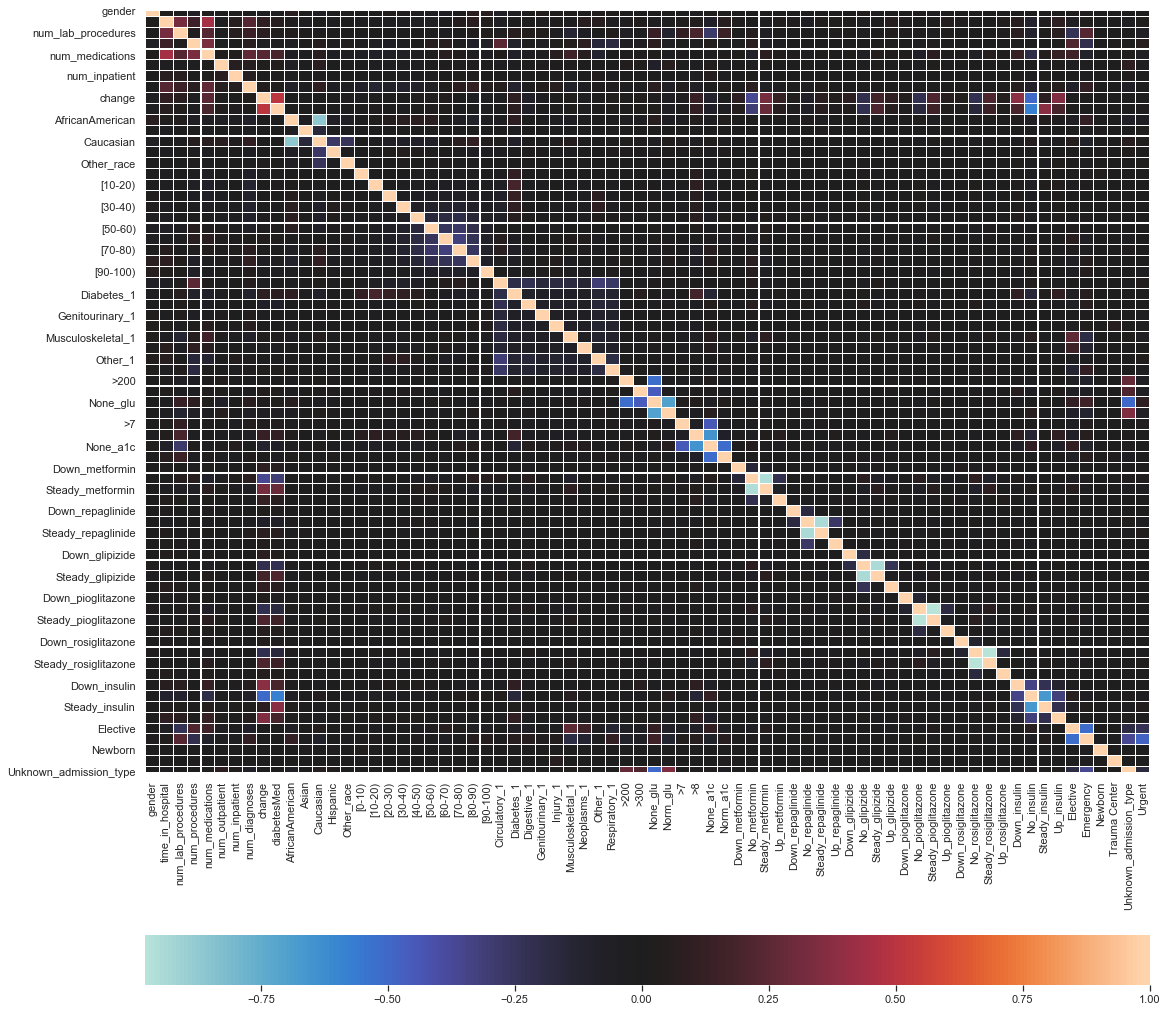

In [40]:
# correlation table
diabetes_corr = diabetes_ml.drop(columns='readmitted')

plt.figure(figsize=(18, 20))
sns.heatmap(diabetes_corr.corr(), center=0, cmap='icefire', linewidths=.1, cbar_kws={'orientation': 'horizontal'})
plt.show()

If the correlation value is greater than 0.7 or less than -0.7, we have to drop one of the two columns.

The correlation map is 96 x 96, which is quite large for this notebook. Instead, we can find each correlation coefficient individually and mark the ones that have a coefficient greater than 0.7 or less than -0.7 in a list.

In [41]:
# create empty list and add columns with large and small coefficients
corr_list = []

for x in diabetes_corr:
    for y in diabetes_corr:
        if (diabetes_corr[x].corr(diabetes_corr[y]) > 0.7) or (diabetes_corr[x].corr(diabetes_corr[y]) < -0.7):
            if x != y:
                corr_list.append([x, y, diabetes_corr[x].corr(diabetes_corr[y])])
                
corr_list # drop one column

[['AfricanAmerican', 'Caucasian', -0.8692010186807986],
 ['Caucasian', 'AfricanAmerican', -0.8692010186807986],
 ['None_glu', 'Norm_glu', -0.7026628122660461],
 ['Norm_glu', 'None_glu', -0.7026628122660461],
 ['No_metformin', 'Steady_metformin', -0.9469432314755514],
 ['Steady_metformin', 'No_metformin', -0.9469432314755514],
 ['No_repaglinide', 'Steady_repaglinide', -0.9446519906149896],
 ['Steady_repaglinide', 'No_repaglinide', -0.9446519906149895],
 ['No_glipizide', 'Steady_glipizide', -0.9411867617188664],
 ['Steady_glipizide', 'No_glipizide', -0.9411867617188661],
 ['No_pioglitazone', 'Steady_pioglitazone', -0.9741024040570521],
 ['Steady_pioglitazone', 'No_pioglitazone', -0.9741024040570521],
 ['No_rosiglitazone', 'Steady_rosiglitazone', -0.9775458628412411],
 ['Steady_rosiglitazone', 'No_rosiglitazone', -0.9775458628412409]]

In [42]:
# drop selected columns
diabetes_ml = diabetes_ml.drop(columns=['Caucasian', 'None_glu', 'No_metformin', 'No_repaglinide', 
                                        'No_glipizide', 'No_pioglitazone', 'No_rosiglitazone'])

# updates dataset
diabetes_ml.head()

,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_inpatient,num_diagnoses,change,diabetesMed,...,No_insulin,Steady_insulin,Up_insulin,Elective,Emergency,Newborn,Trauma Center,Unknown_admission_type,Urgent,readmitted
0,1,3,59,0,18,0,0,9,1,1,...,0,0,1,0,1,0,0,0,0,YES
1,1,2,11,5,13,2,1,6,0,1,...,1,0,0,0,1,0,0,0,0,NO
2,0,2,44,1,16,0,0,7,1,1,...,0,0,1,0,1,0,0,0,0,NO
3,0,1,51,0,8,0,0,5,1,1,...,0,1,0,0,1,0,0,0,0,NO
4,0,3,31,6,16,0,0,9,0,1,...,0,1,0,0,0,0,0,0,1,YES


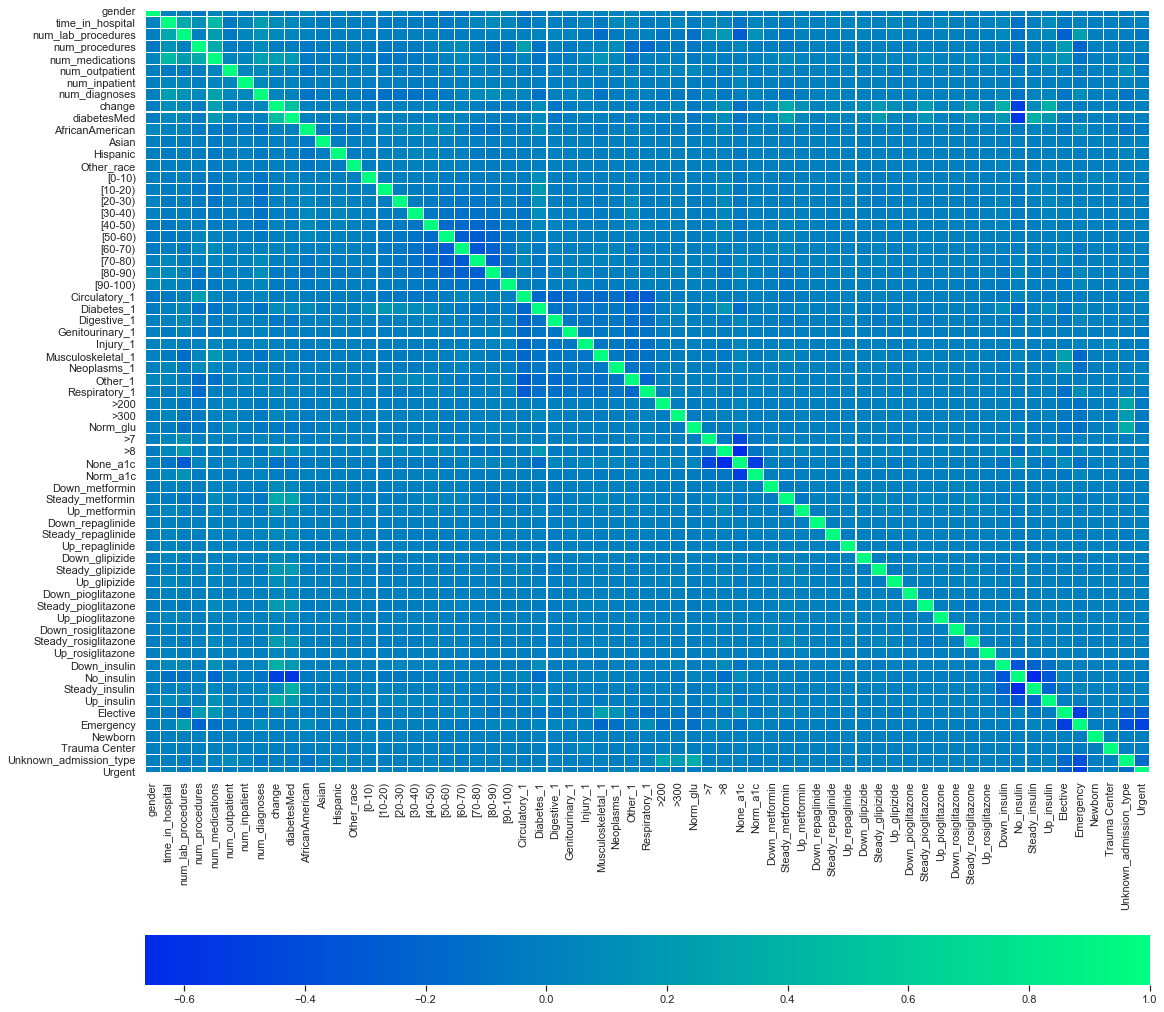

In [43]:
# updated heatmap
plt.figure(figsize=(18, 20))
sns.heatmap(diabetes_ml.corr(), center=0, cmap='winter', linewidths=.1, cbar_kws={'orientation': 'horizontal'})
plt.show()

In [44]:
# update diabetes_corr list
diabetes_corr = diabetes_corr.drop(columns=['Caucasian', 'None_glu', 'No_metformin', 'No_repaglinide', 'No_glipizide', 
                                        'No_pioglitazone', 'No_rosiglitazone'])

# look for new coefficients
corr_list_new = []

for x in diabetes_corr:
    for y in diabetes_corr:
        if (diabetes_corr[x].corr(diabetes_corr[y]) > 0.7) or (diabetes_corr[x].corr(diabetes_corr[y]) < -0.7):
            if x != y:
                corr_list.append([x, y, diabetes_corr[x].corr(diabetes_corr[y])])
                
corr_list_new # good to go!

[]

# saving machine learning dataset

In [45]:
# save dataset to new file for machine learning
# diabetes_ml.to_csv('diabetes_ml.csv')